<a href="https://colab.research.google.com/github/porekhov/drug_design_2024/blob/main/bace1_activity_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **Install Conda Colab, rdkit, and other dependences**
%%capture
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge rdkit -y
!pip install chembl_webresource_client

In [1]:
import pandas as pd
# IC50 data from Chembl
df = pd.read_csv('bace1.csv', sep = ';')
print(df.shape)
print(df)
print(df.index)
print(df.columns)

(10619, 46)
      Molecule ChEMBL ID       Molecule Name  Molecule Max Phase  \
0           CHEMBL247416                 NaN                 NaN   
1           CHEMBL429477                 NaN                 NaN   
2           CHEMBL393850                 NaN                 NaN   
3             CHEMBL1546  HYDROXYAMPHETAMINE                 4.0   
4           CHEMBL502753                 NaN                 NaN   
...                  ...                 ...                 ...   
10614      CHEMBL5220695                 NaN                 NaN   
10615      CHEMBL5187186                 NaN                 NaN   
10616      CHEMBL5184716                 NaN                 NaN   
10617      CHEMBL5186773                 NaN                 NaN   
10618      CHEMBL5184228                 NaN                 NaN   

       Molecular Weight  #RO5 Violations  AlogP       Compound Key  \
0                541.64              1.0   3.56  18, diastereomers   
1                575.78        

In [2]:
df_short = df[df['Standard Relation'] == "'='"]
df_short.shape

(9848, 46)

In [3]:
df_nona = df_short.dropna(subset=['pChEMBL Value'])
df_nona.shape

(9716, 46)

<Axes: xlabel='pChEMBL Value', ylabel='Density'>

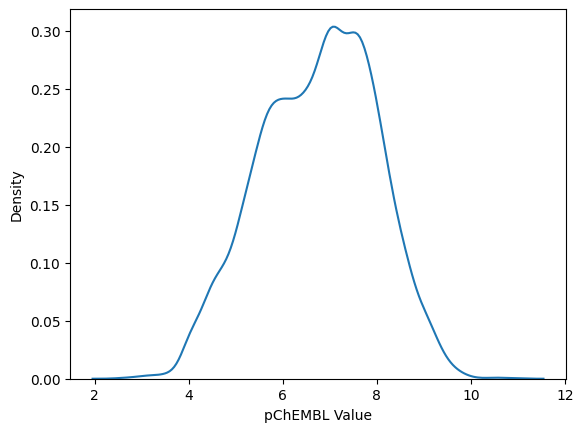

In [4]:
import seaborn as sns
sns.kdeplot(data=df_nona, x = "pChEMBL Value")

In [6]:
df_nona['Activity'] = df_nona['pChEMBL Value'] > 6
df_nona

<ipython-input-6-a4c6410b3f91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['Activity'] = df_nona['pChEMBL Value'] > 6


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Activity
0,CHEMBL247416,NaN,NaN,541.64,1.0,3.56,"18, diastereomers",CC1CC1CNc1cc(C(=O)N[C@@H](Cc2ccccc2)[C@@H](N)C...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1139116,1,Scientific Literature,Bioorg Med Chem Lett,2007,NaN,NaN,NaN,True
1,CHEMBL429477,NaN,NaN,575.78,1.0,2.68,27,COCCN(C[C@H]1C[C@@H]1C)c1cc(C(=O)N[C@@H](Cc2cc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1139116,1,Scientific Literature,Bioorg Med Chem Lett,2007,NaN,NaN,NaN,True
2,CHEMBL393850,NaN,NaN,445.59,0.0,1.85,"16, diastereomers",CC1CC1CNc1cc(C(=O)N[C@H](CN)Cc2ccccc2)cc(N(C)S...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1139116,1,Scientific Literature,Bioorg Med Chem Lett,2007,NaN,NaN,NaN,True
5,CHEMBL220813,NaN,NaN,574.71,1.0,3.68,3b,CCCN(CCC)C(=O)c1cccc(C(=O)N[C@@H](Cc2cc(F)cc(F...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1141415,1,Scientific Literature,J Med Chem,2007,CHEMBL3307976,NaN,NaN,True
7,CHEMBL255838,NaN,NaN,832.89,3.0,-0.24,"14, KMI-574",CC(C)[C@H](NC(=O)[C@@H](N)CNC(=O)c1[nH]c(=O)[n...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1158556,1,Scientific Literature,Bioorg Med Chem,2010,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,CHEMBL5220695,NaN,NaN,377.49,0.0,3.35,115,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,IC50,'=',...,SINGLE PROTEIN,CHEMBL5214927,1,Scientific Literature,Eur J Med Chem,2022,NaN,NaN,INHIBITOR,True
10615,CHEMBL5187186,NaN,NaN,329.81,0.0,4.15,10,C[C@@]1(c2cc(-c3ccc(Cl)cn3)ccc2F)C[C@@H]2C[C@@...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5154668,1,Scientific Literature,Eur J Med Chem,2022,NaN,NaN,INHIBITOR,True
10616,CHEMBL5184716,NaN,NaN,371.39,0.0,3.14,14,COc1cnc(-c2ccc(F)c([C@]3(CF)CC[C@](C)(C#N)C(N)...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5154668,1,Scientific Literature,Eur J Med Chem,2022,NaN,NaN,INHIBITOR,True
10617,CHEMBL5186773,NaN,NaN,389.38,0.0,3.43,15,COc1cnc(-c2ccc(F)c([C@]3(C(F)F)CC[C@@](C)(C#N)...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5154668,1,Scientific Literature,Eur J Med Chem,2022,NaN,NaN,INHIBITOR,True


In [7]:
# RDKit is a python library for chemoinformatics
from rdkit import Chem
# for most of descriptors:
from rdkit.Chem.rdMolDescriptors import *
# for logP and MR:
from rdkit.Chem import Crippen
smiles = df_nona['Smiles'][0]
print(smiles)
CalcExactMolWt(Chem.MolFromSmiles(smiles))

CC1CC1CNc1cc(C(=O)N[C@@H](Cc2ccccc2)[C@@H](N)CCC(F)(F)F)cc(N(C)S(C)(=O)=O)n1


541.233445608

In [8]:
desc = []
for i in df_nona['Smiles']:
    m = CalcExactMolWt(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['MW'] = desc

desc = []
for i in df_nona['Smiles']:
    m = CalcTPSA(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['TPSA'] = desc

desc = []
for i in df_nona['Smiles']:
    m = CalcFractionCSP3(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['CSP3'] = desc

desc = []
for i in df_nona['Smiles']:
    m = CalcNumHeavyAtoms(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['NHA'] = desc

desc = []
for i in df_nona['Smiles']:
    m = CalcNumHBA(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['HBA'] = desc

desc = []
for i in df_nona['Smiles']:
    m = CalcNumHBD(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['HBD'] = desc

desc = []
for i in df_nona['Smiles']:
    m = CalcNumRotatableBonds(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['NRB'] = desc

desc = []
for i in df_nona['Smiles']:
    m = CalcNumRings(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['NR'] = desc

desc = []
for i in df_nona['Smiles']:
    m = Crippen.MolLogP(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['logP'] = desc

desc = []
for i in df_nona['Smiles']:
    m = Crippen.MolMR(Chem.MolFromSmiles(i))
    desc.append(m)
df_nona['MR'] = desc

<ipython-input-8-362bce0f8895>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['MW'] = desc
<ipython-input-8-362bce0f8895>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['TPSA'] = desc
<ipython-input-8-362bce0f8895>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [9]:
df_nona.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,MW,TPSA,CSP3,NHA,HBA,HBD,NRB,NR,logP,MR
0,CHEMBL247416,NaN,NaN,541.64,1.0,3.56,"18, diastereomers",CC1CC1CNc1cc(C(=O)N[C@@H](Cc2ccccc2)[C@@H](N)C...,IC50,'=',...,541.233446,117.42,0.520000,37,6,3,12,3,3.5562,137.9091
1,CHEMBL429477,NaN,NaN,575.78,1.0,2.68,27,COCCN(C[C@H]1C[C@@H]1C)c1cc(C(=O)N[C@@H](Cc2cc...,IC50,'=',...,575.314141,127.09,0.586207,40,8,2,16,3,2.6796,159.3074
2,CHEMBL393850,NaN,NaN,445.59,0.0,1.85,"16, diastereomers",CC1CC1CNc1cc(C(=O)N[C@H](CN)Cc2ccccc2)cc(N(C)S...,IC50,'=',...,445.214761,117.42,0.454545,31,6,3,10,3,1.8451,123.6991
5,CHEMBL220813,NaN,NaN,574.71,1.0,3.68,3b,CCCN(CCC)C(=O)c1cccc(C(=O)N[C@@H](Cc2cc(F)cc(F...,IC50,'=',...,574.333062,110.77,0.516129,41,5,4,16,2,3.6793,155.5629
7,CHEMBL255838,NaN,NaN,832.89,3.0,-0.24,"14, KMI-574",CC(C)[C@H](NC(=O)[C@@H](N)CNC(=O)c1[nH]c(=O)[n...,IC50,'=',...,832.378035,311.93,0.435897,60,12,10,18,5,-0.2374,214.1683


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # create scaler object
# add to the list below names of all descriptors
desc_names = ['MW','HBA','TPSA','CSP3','NHA','HBD','NRB','NR','logP','MR']
# scale and rewrite the data in the dataframe
df_nona[desc_names] = scaler.fit_transform(df_nona[desc_names])

<ipython-input-10-a3fb0a164e4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona[desc_names] = scaler.fit_transform(df_nona[desc_names])


In [13]:
df_nona.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,MW,TPSA,CSP3,NHA,HBA,HBD,NRB,NR,logP,MR
0,CHEMBL247416,NaN,NaN,541.64,1.0,3.56,"18, diastereomers",CC1CC1CNc1cc(C(=O)N[C@@H](Cc2ccccc2)[C@@H](N)C...,IC50,'=',...,0.141970,0.111876,0.557143,0.133333,0.095238,0.09375,0.129032,0.230769,0.582393,0.137692
1,CHEMBL429477,NaN,NaN,575.78,1.0,2.68,27,COCCN(C[C@H]1C[C@@H]1C)c1cc(C(=O)N[C@@H](Cc2cc...,IC50,'=',...,0.153623,0.121493,0.628079,0.147619,0.142857,0.06250,0.172043,0.230769,0.544809,0.165365
2,CHEMBL393850,NaN,NaN,445.59,0.0,1.85,"16, diastereomers",CC1CC1CNc1cc(C(=O)N[C@H](CN)Cc2ccccc2)cc(N(C)S...,IC50,'=',...,0.109138,0.111876,0.487013,0.104762,0.095238,0.09375,0.107527,0.230769,0.509031,0.119316
5,CHEMBL220813,NaN,NaN,574.71,1.0,3.68,3b,CCCN(CCC)C(=O)c1cccc(C(=O)N[C@@H](Cc2cc(F)cc(F...,IC50,'=',...,0.153288,0.105262,0.552995,0.152381,0.071429,0.12500,0.172043,0.153846,0.587670,0.160523
7,CHEMBL255838,NaN,NaN,832.89,3.0,-0.24,"14, KMI-574",CC(C)[C@H](NC(=O)[C@@H](N)CNC(=O)c1[nH]c(=O)[n...,IC50,'=',...,0.241521,0.305324,0.467033,0.242857,0.238095,0.31250,0.193548,0.384615,0.419747,0.236312


[0.51175731 0.24104551 0.14809374]


<ipython-input-17-486a7837bd3c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['PC1'] = pca_desc_drugs.T[0]
<ipython-input-17-486a7837bd3c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['PC2'] = pca_desc_drugs.T[1]
<ipython-input-17-486a7837bd3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

[]

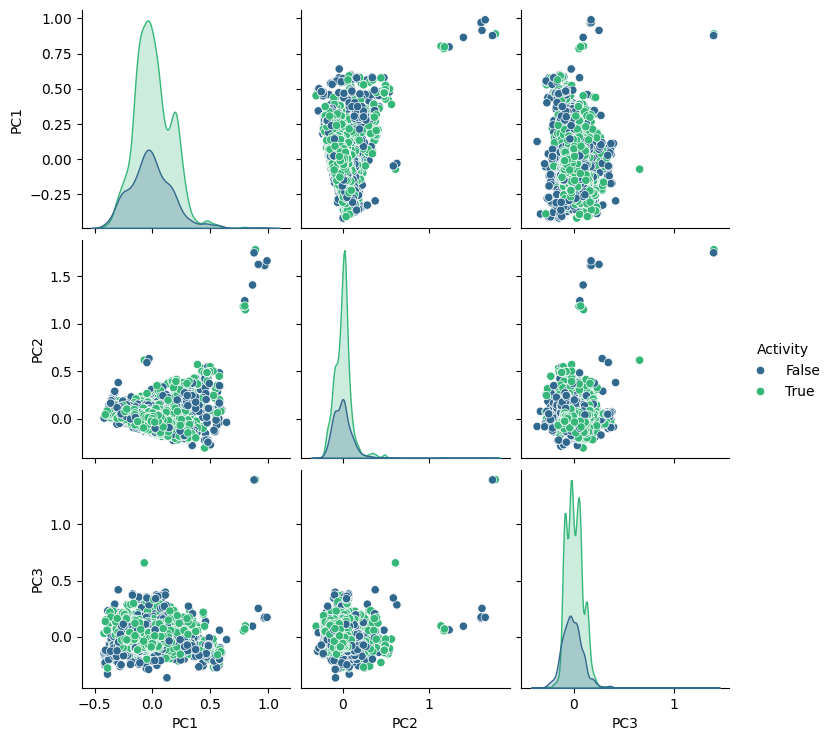

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca_desc = PCA(n_components=3, random_state=0)
pca_desc_drugs = pca_desc.fit_transform(df_nona[desc_names])
print(pca_desc.explained_variance_ratio_)
df_nona['PC1'] = pca_desc_drugs.T[0]
df_nona['PC2'] = pca_desc_drugs.T[1]
df_nona['PC3'] = pca_desc_drugs.T[2]
sns.pairplot(df_nona, hue='Activity', vars=['PC1', 'PC2', 'PC3'], palette='viridis')
plt.plot()

In [18]:
from sklearn.model_selection import train_test_split
# split the whole dataset in ratio 70:30 between train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_nona, df_nona['Activity'], test_size=0.30, random_state=1234)
X_train, X_test = X_train[desc_names], X_test[desc_names]

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# create the predictor object
forest = RandomForestClassifier(random_state=1234)
# train the model
forest.fit(X_train, y_train)
# predicting classes for the test set
y_pred = forest.predict(X_test)
# get the probabilities for the test set
y_pred_proba = forest.predict_proba(X_test)
# get the accuracy scores
print('Accuracy for the training set:', metrics.accuracy_score(y_train, forest.predict(X_train)))
print('Accuracy for the test set:', metrics.accuracy_score(y_test, y_pred))

Accuracy for the training set: 0.9585355094838994
Accuracy for the test set: 0.8315608919382504
